100


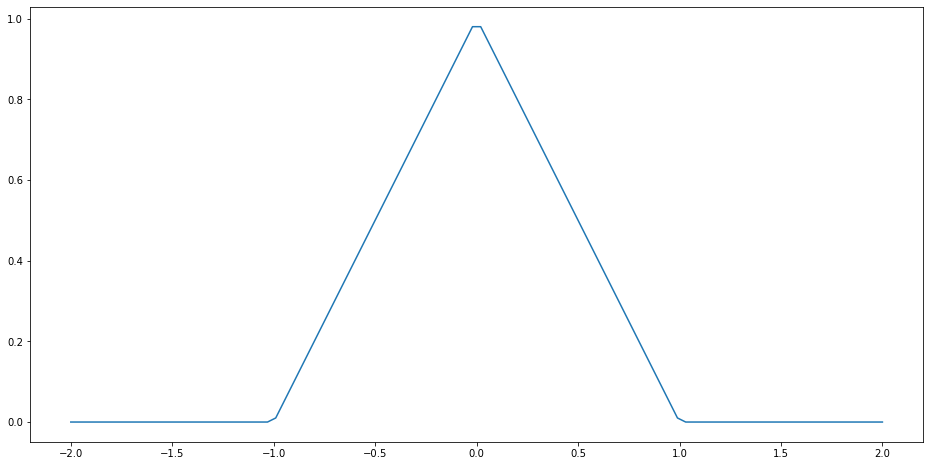

In [116]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
from scipy import signal
plt.rcParams['figure.figsize'] = [16, 8]


t = np.linspace(-2,2, 100)
triangle = np.zeros((1,100))
triangle = np.where((t >= -1) & (t <= 1), (1 - np.abs(t)  - 0.5)  + 0.5 , 1)
#triangle = np.where((t > -1) & (t < 1), (1 - np.abs(t) - 0.5)  + 0.5 , 1)
triangle = np.where((t > -1), triangle, 0)
triangle = np.where((t < 1), triangle, 0)
plt.plot(t,triangle)

print(triangle.shape[0])

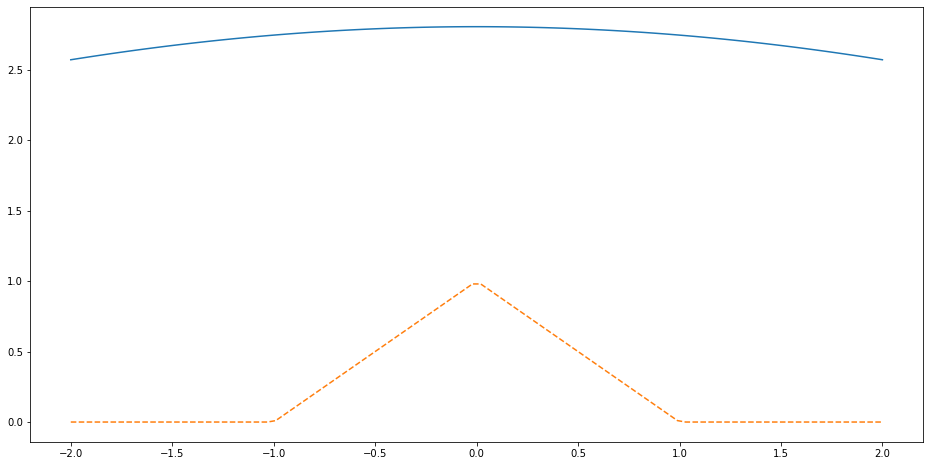

In [150]:
#Compute the Fourier Series by hand for the domain t=[-2,2] 
def Fourier_Series(X,t):
    
    L = X.shape[0]
    dx = 1/L
    A0 = np.sum(X * np.ones_like(X)) * dx
    an = np.zeros(L)
    bn = np.zeros(L)
    fFS = A0/2
    for n in range(100):
        an[n] = np.sum(X * np.cos(2*np.pi*(n+1)*t/L)) * dx
        bn[n] = np.sum(X * np.sin(2*np.pi*(n+1)*t/L)) * dx
        fFS = fFS + an[n]*np.cos((n+1)*np.pi*t/L) + bn[n]*np.sin((n+1)*np.pi*t/L)
        
        if n == 10:
         plt.plot(t,fFS,'-', t, X, '--')
        
    return an, bn, f


a, b, f = Fourier_Series(triangle,t)

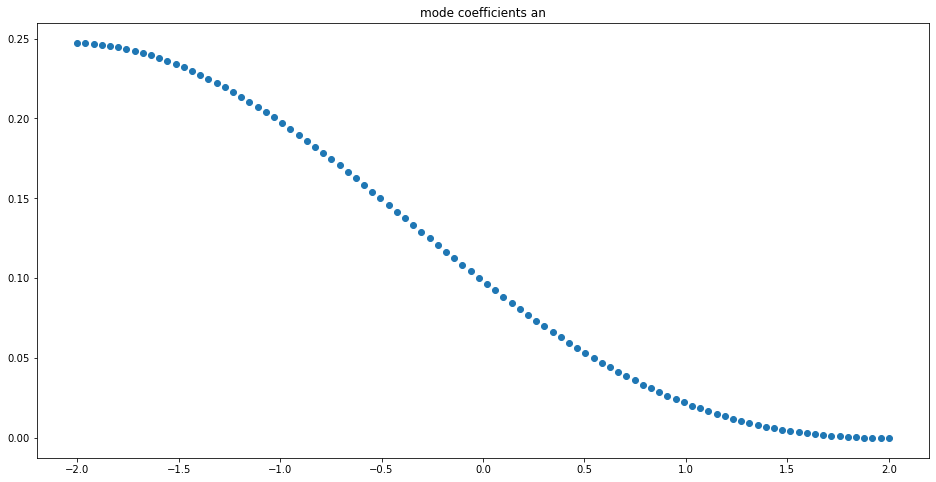

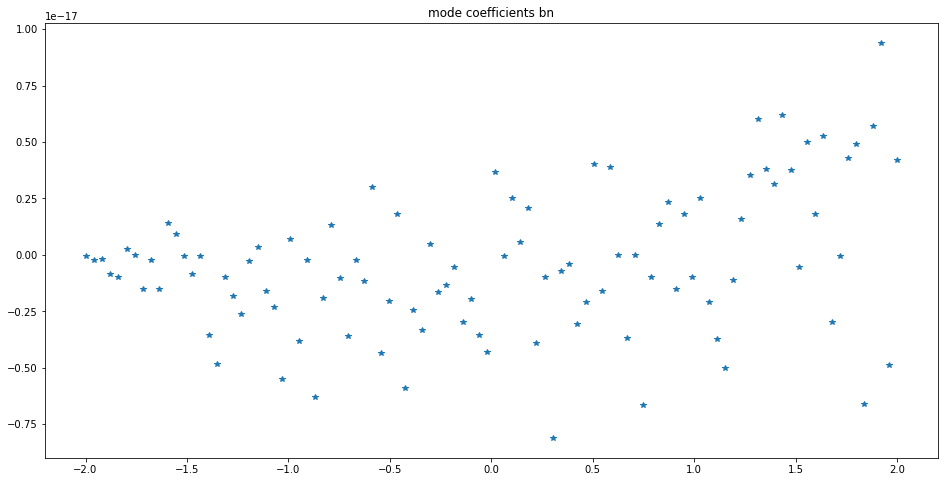

In [147]:
plt.plot(t,a,'o')
plt.title('mode coefficients an')
plt.show()
plt.title('mode coefficients bn')
plt.plot(t,b,'*')